# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].nunique()
print(mice_count)

249


In [54]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Show the cleaned data
clean_data.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [56]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    Sem="sem"
).reset_index()

(summary_statistics)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Drug Regimen,Mean,Median,Variance,Std_Dev,Sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Mouse ID/Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows (Mouse ID/Timepoints)'>

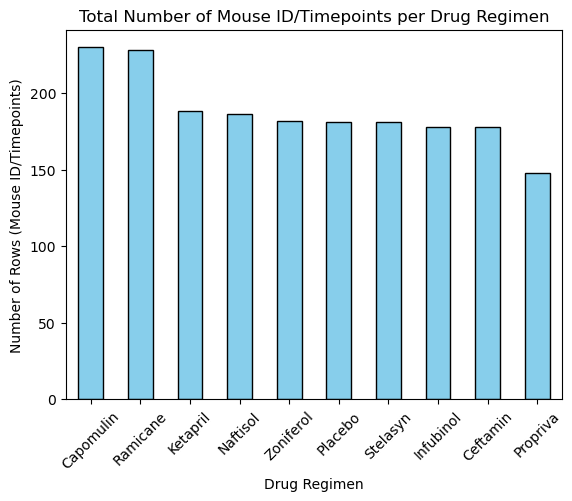

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data["Drug Regimen"].value_counts().plot.bar(
    title="Total Number of Mouse ID/Timepoints per Drug Regimen",
    xlabel="Drug Regimen",
    ylabel="Number of Rows (Mouse ID/Timepoints)",
    rot=45,
    color="skyblue",
    edgecolor="black"
)

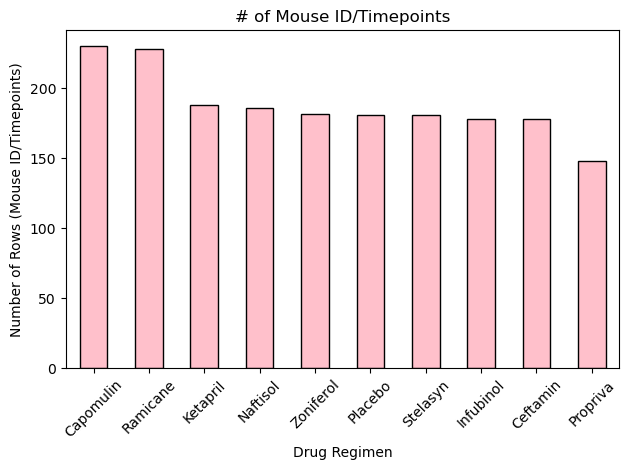

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_of_rows = clean_data["Drug Regimen"].value_counts()

# Generate a bar plot
number_of_rows.plot(kind='bar', color='pink', edgecolor='black')
plt.title("# of Mouse ID/Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

<Axes: title={'center': ' Female vs Male Mice'}, ylabel='count'>

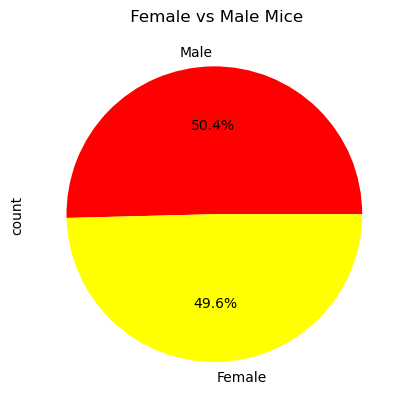

In [61]:

gender_distribution = clean_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()


gender_distribution.plot.pie(
    autopct="%1.1f%%",
    title=" Female vs Male Mice",
    ylabel="count",
    colors=["red", "yellow"]
)




([<matplotlib.patches.Wedge at 0x1fbe7d69c10>,
 [Text(-1.0999117423341975, -0.013934097579311062, 'Male'),
  Text(1.0999117423341975, 0.013934097579310929, 'Female')],
 [Text(-0.5999518594550168, -0.007600416861442397, '50.4%'),
  Text(0.5999518594550168, 0.007600416861442324, '49.6%')])

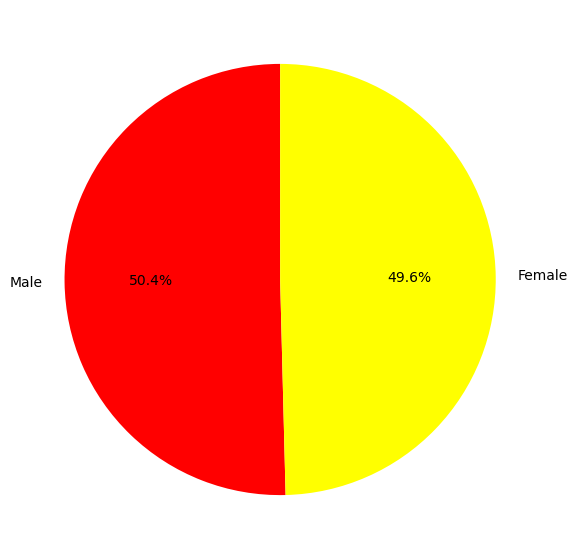

In [62]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(7, 7))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct="%1.1f%%",
    colors=["red", "yellow"],
    startangle=90
)



## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for treatment in treatments:
    
    treatment_data = data[data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
  
    tumor_volumes.append(treatment_data.tolist())

    # Calculate the IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine the upper and lower bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Find any outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]


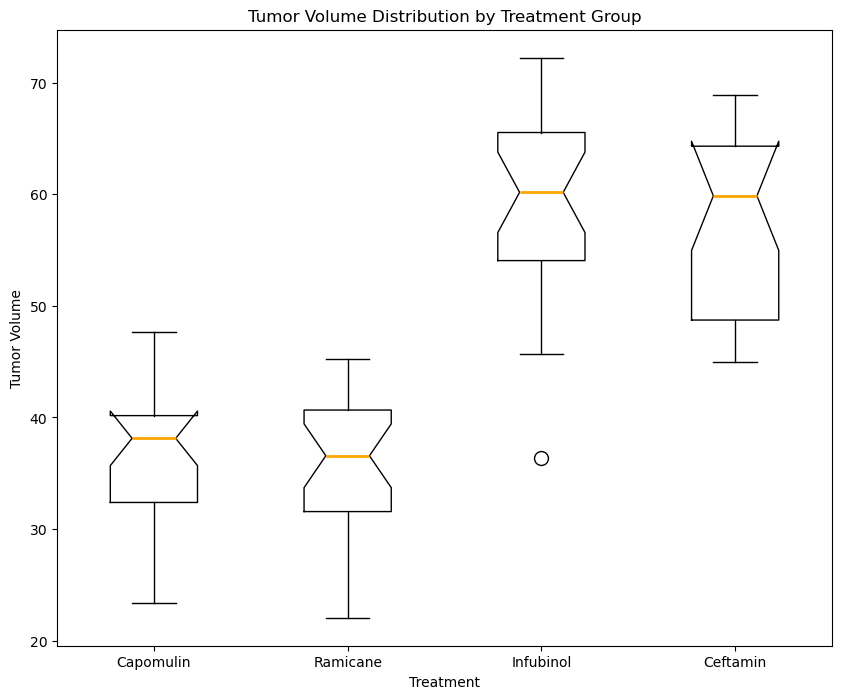

In [65]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
datatt =tumor_volumes

df = pd.DataFrame(datatt)



# Create the box plot
plt.figure(figsize=(10, 8))
box = plt.boxplot(
    tumor_volumes,
     treatments,
    flierprops={"marker": "o", "color": "red", "markersize": 10},  
    medianprops={"color": "orange", "linewidth": 2}  
)

plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume')
plt.xticks(ticks=[1, 2, 3, 4], labels=treatments)  
plt.show()



## Line and Scatter Plots

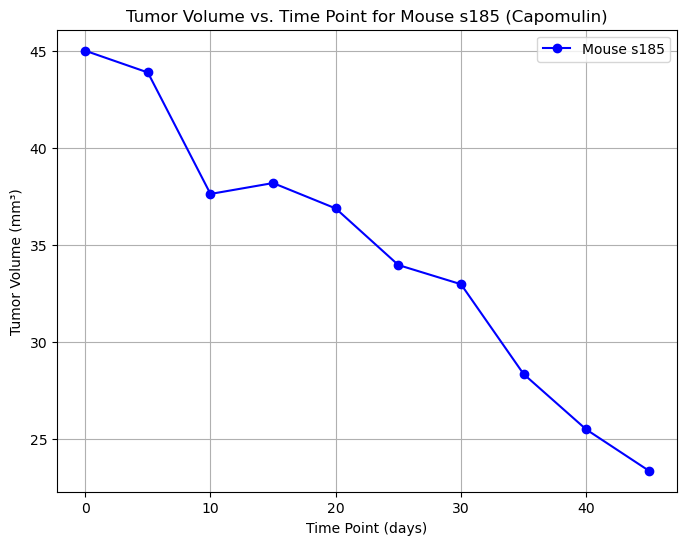

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "s185"
capomulin_mouse = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == mouse_id)]

# Plot tumor volume vs. timepoint for the  mouse
plt.figure(figsize=(8, 6))
plt.plot(
    capomulin_mouse["Timepoint"], 
    capomulin_mouse["Tumor Volume (mm3)"], 
    marker='o', color='blue', label=f"Mouse {mouse_id}"
)

# Add labels, title, and legend
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm³)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.legend()
plt.grid(True)


plt.show()

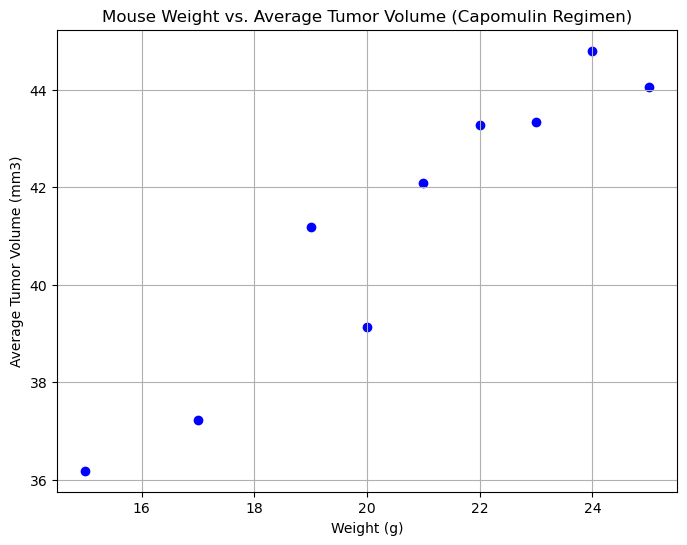

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_vol_select = clean_data[
    (clean_data["Drug Regimen"] == "Capomulin") & 
    (clean_data['Weight (g)'].notnull()) & 
    (clean_data['Tumor Volume (mm3)'].notnull())
][['Weight (g)', 'Tumor Volume (mm3)']]


grouped_data = weight_vol_select.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Plot the scatter plot 
plt.figure(figsize=(8,6))
plt.scatter(grouped_data.index, grouped_data, color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

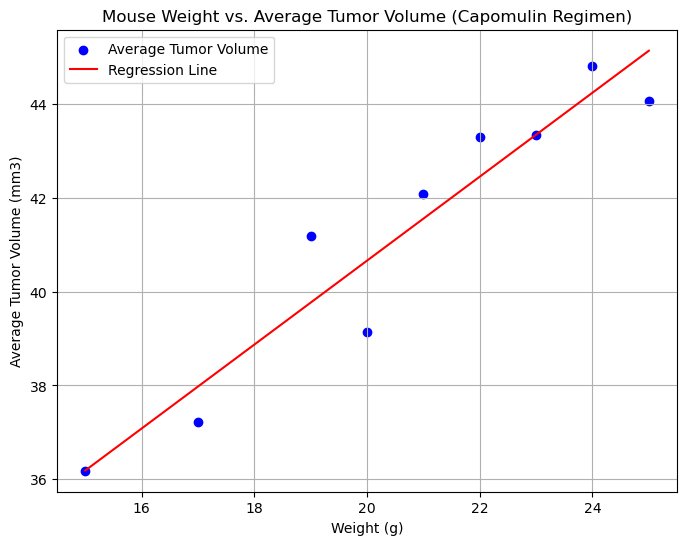

In [68]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = grouped_data.index
avg_tumor_volume = grouped_data.values

# correlation coefficient
correlation = np.corrcoef(weight, avg_tumor_volume)[0, 1]

#linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, avg_tumor_volume)


# Plot the scatter plot with the regression line
plt.figure(figsize=(8,6))
plt.scatter(weight, avg_tumor_volume, color='blue', label='Average Tumor Volume')
plt.plot(weight, slope * weight + intercept, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()